In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

In [4]:
# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'non linear': 'halofit'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [5]:
classy_template

{'output': 'tCl pCl lCl',
 'l_max_scalars': 2500,
 'lensing': 'yes',
 'non linear': 'halofit',
 'omega_b': 0.02222,
 'omega_cdm': 0.1197,
 'h': 0.69,
 'A_s': 2.1955e-09,
 'n_s': 0.9655,
 'tau_reio': 0.06}

In [6]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', classy_dict=classy_template)

In [7]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_right', classy_dict=classy_right)

In [8]:
example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)

In [9]:
fisher = example_Planck.get_fisher(obs)

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


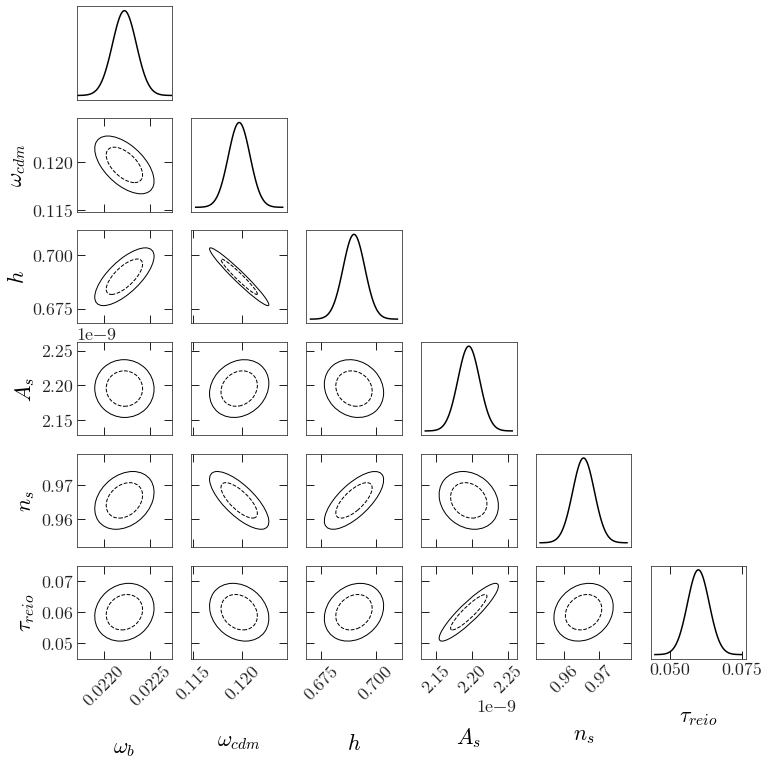

In [10]:
cov = np.linalg.inv(fisher)
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$A_s$', r'$n_s$', r'$\tau_{reio}$']
fishchips.util.plot_triangle(obs, cov, labels=labels);

(1e-06, 10000.0)

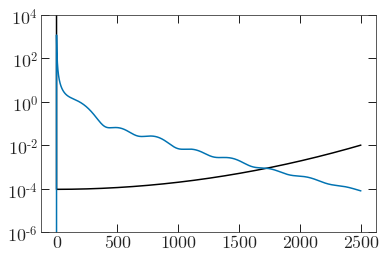

In [11]:
plt.plot(example_Planck.noise_T, '-')
plt.plot(obs.cosmos['fiducial'].lensed_cl()['tt'] * (2.72*1e6)**2, '-')
plt.yscale('log')
plt.ylim(1e-6,1e4)

# Plotting without an `obs` object

You might want to plot a generic covariance matrix. You can avoid constructing an `Observables` object and just use the fishchips plotting utilities, by calling `plot_triangle_base`. The `plot_ellipse` function is general and doesn't depend on `fishchips` either.

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


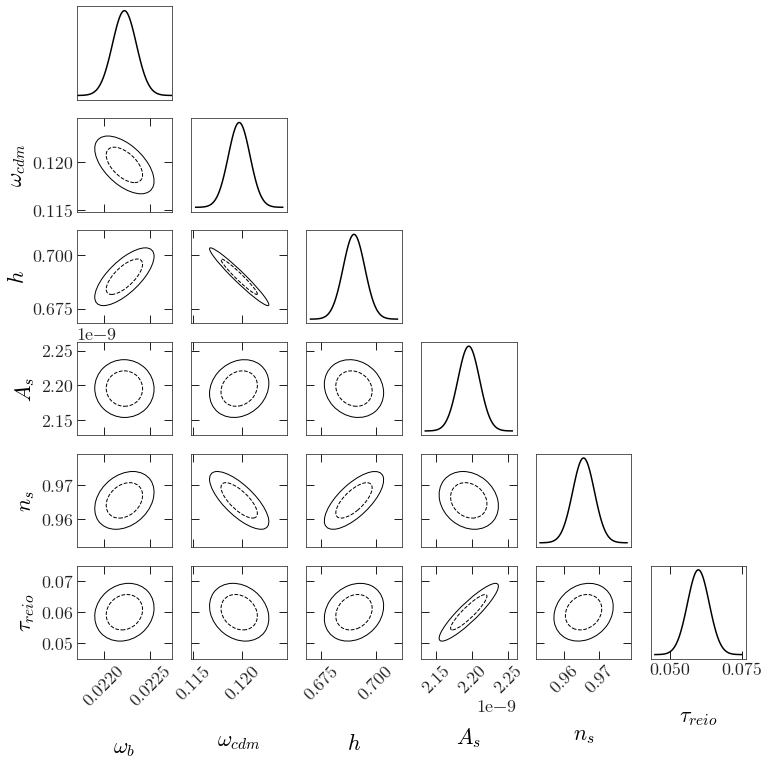

In [12]:
import fishchips.util

cov = np.linalg.inv(fisher)
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$A_s$', r'$n_s$', r'$\tau_{reio}$']
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
fig, axes = fishchips.util.plot_triangle_base(pars, centers, cov, labels=labels);

You can pass arguments as you would to `ax.set_xlabel` and `ax.set_ylabel` using the `xlabel_kwargs` and `ylabel_kwargs` parameters.

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


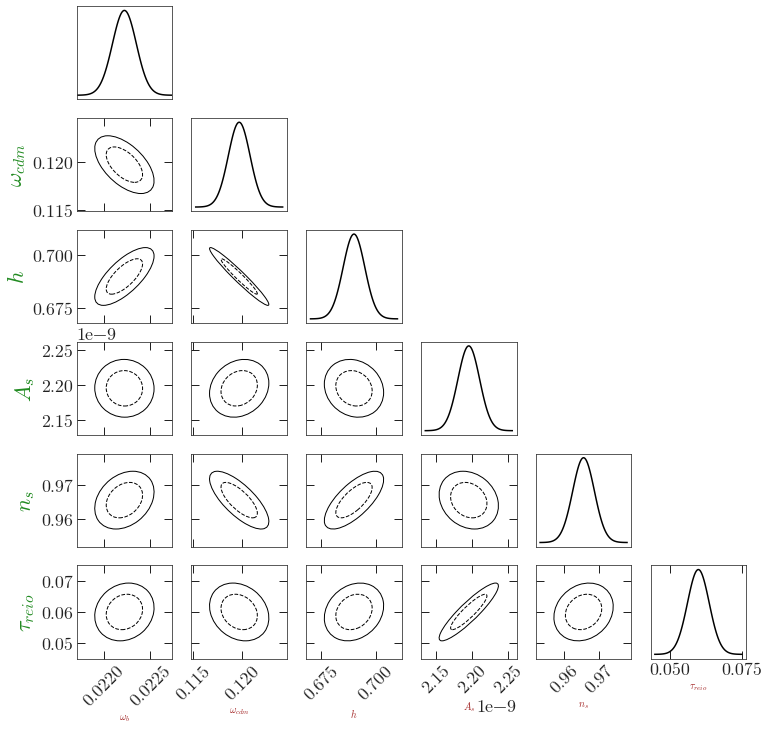

In [13]:
fig, axes = fishchips.util.plot_triangle_base(
    pars, centers, cov, labels=labels,
    xlabel_kwargs={'color':'brown', 'fontsize':10},
    ylabel_kwargs={'color':'forestgreen'}
);

## Overplotting
You just pass the `fig` and `axes` you get from the previous plot, into the next one.

generating new axis
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$A_s$', '$n_s$', '$\\tau_{reio}$']


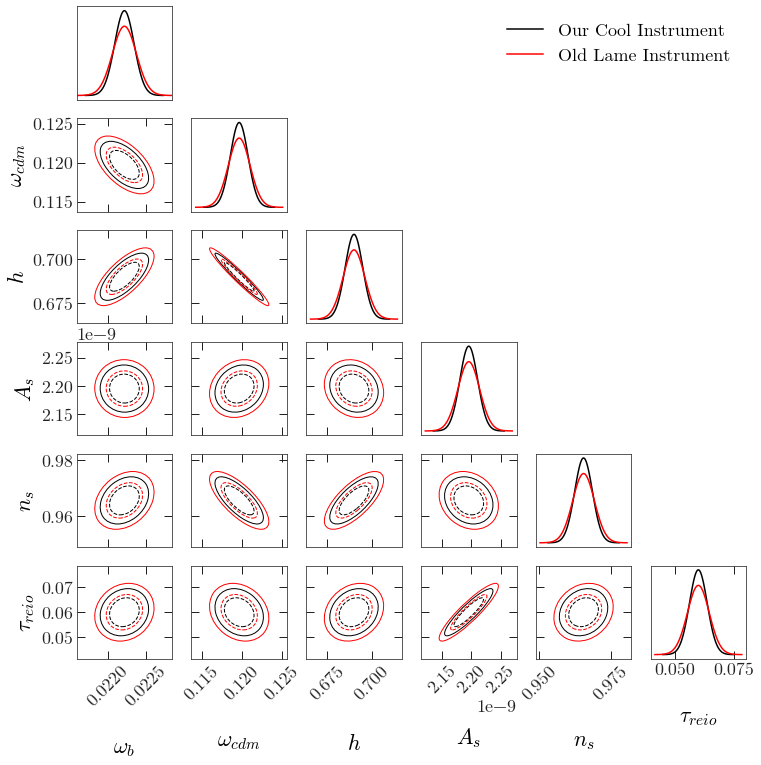

In [14]:
import fishchips.util

cov = np.linalg.inv(fisher)
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$A_s$', r'$n_s$', r'$\tau_{reio}$']
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06])
fig, axes = fishchips.util.plot_triangle_base(pars, centers, cov, labels=labels);

# now plot a slightly worse instrument
fishchips.util.plot_triangle_base(pars, centers, cov * 1.5, 
                                  f=fig, ax=axes, labels=labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'red'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'red'},
                                  color_1d='red'
                                 );

l1, = axes[0, -1].plot([],[],'-',color="black", label='Our Cool Instrument')
l2, = axes[0, -1].plot([],[],'-',color="red", label='Old Lame Instrument')
axes[0, -1].legend()

## Custom Plotting
You might want to get *really customized*. Then you probably just call `plot_ellipse` in your own loop. Here the outer ellipse is **sketchy** and the inner ellipse is **funky**.

Text(0, 0.5, '$\\tau_{reio}$')

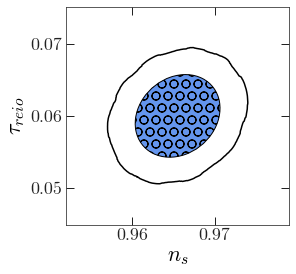

In [15]:
fig, ax = plt.subplots(figsize=(4,4))

fishchips.util.plot_ellipse(ax, 'n_s', 'tau_reio',
                            pars, centers, cov, 
                            kwargs1={
                                'facecolor' : 'cornflowerblue',
                                'hatch' : 'O',
                                'alpha' : 0.5
                            },
                            kwargs2={
                                'sketch_params' : 1.0,
                                'lw' : 1.5
                            }
                           );
ax.set_xlabel(r'$n_s$')
ax.set_ylabel(r'$\tau_{reio}$')